## Computational carpentry - Group 04 - Nichelle Sequeira, Ludovica Fracassi & Emma Kappeler

## Part A

### Part A.1: Loading and Displaying Data from a CSV File

In this section, we will load a CSV file containing molecular data into a Pandas DataFrame and display the first few rows for an initial inspection.

### Steps

1. **Import the Pandas Library**  
   We start by importing the `pandas` library, which is essential for data manipulation and analysis in Python.

2. **Load CSV Data into a DataFrame**  
   We specify the path to the CSV file and use the `pd.read_csv()` function to load the data into a DataFrame.

3. **Display the DataFrame**  
   After loading the data, we will display the first few rows to inspect the structure of the dataset using the `df.head()` function.


In [3]:
#Part A.1
import pandas as pd

# path to csv file
csv_file_path = '/Users/ludovica/Documents/Bachelor/BA5/Modeling Lab/4-Molecules.csv'

# Load the CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()

,row ID,Molecule,Molecule name,Mannhold LogP,Atomic Polarizabilities,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Polarizabilities,Bond Count,...,XLogP,Zagreb Index,Molecular Formula,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,Molar Mass,SP3 Character,Rotatable Bonds Count (non terminal)
0,Row0,N,H3N,1.35,3.100379,0,0,4,1.299621,0,...,0.000,0,H3N,0,0,0,1,17.0305254685134,0.000000,0
1,Row1,O=C(O)c1c(OC(=O)C)cccc1,C9H8O4,2.01,24.382344,6,6,21,12.577656,13,...,1.422,60,C9H8O4,0,0,0,13,180.157768811976,0.047619,3
2,Row2,C#C,C2H2,1.68,4.853586,0,0,4,2.186414,1,...,0.418,2,C2H2,0,0,0,2,26.0373533012276,0.000000,0
3,Row3,P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)...,C10H16N5O13P3,0.25,55.084688,9,10,47,55.749312,33,...,-5.533,170,C10H16N5O13P3,0,0,0,31,507.181476012675,0.106383,8
4,Row4,S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...,C16H19N3O4S,2.34,50.237067,6,6,43,27.904933,26,...,-1.732,132,C16H19N3O4S,0,0,0,24,349.406462995722,0.162791,4


### Explanation: What is this data about? (A.2)

The data provided in *"4-Molecules.csv"*, taken from Wikipedia, appears to contain a list of all Wikipedia compound structures with their names and formulas.

Each column has it's own piece of information as mentioned below;

1. **row ID**: Unique identifier for each row.
2. **Molecule**: Molecular structure, likely in SMILES format (Simplified Molecular Input Line Entry System).
3. **Molecule name**: The chemical formula of the molecule (e.g., `H3N`, `C9H8O4`).
4. **Mannhold LogP**: A measure of the hydrophobicity (lipophilicity) of the molecule, indicating how well it dissolves in fats versus water.
5. **Atomic Polarizabilities**: The degree to which the distribution of electron density around atoms can be distorted.
6. **Aromatic Atoms Count**: The number of atoms that are part of aromatic rings in the molecule.
7. **Aromatic Bonds Count**: The number of bonds that are part of aromatic rings.
8. **Element Count**: The total number of elements (atoms) in the molecule.
9. **Bond Polarizabilities**: The polarizability of bonds in the molecule, indicating how bonds can be distorted.
10. **Bond Count**: The total number of bonds in the molecule.
11. **Ring Count**: The number of rings present in the molecular structure.
12. **Ring Atom Count**: The number of atoms that are part of rings.
13. **Ring Bond Count**: The number of bonds that are part of rings.
14. **Rotatable Bonds Count**: Number of bonds that can rotate freely (influence molecular flexibility).
15. **Rotatable Bonds Count (non terminal)**: Number of rotatable bonds excluding terminal atoms.
16. **XLogP**: A calculation of the octanol-water partition coefficient, indicating the hydrophobicity of the molecule.
17. **Zagreb Index**: A topological descriptor used in chemistry, related to the molecular graph's connectivity.
18. **Molecular Formula**: The chemical formula of the molecule.
19. **Formal Charge**: The net charge on the molecule.
20. **Formal Charge (pos)**: The total positive formal charge on the molecule.
21. **Formal Charge (neg)**: The total negative formal charge on the molecule.
22. **Heavy Atoms Count**: The number of heavy atoms (all atoms except hydrogen).
23. **Molar Mass**: The molecular mass of the molecule, in atomic mass units (amu).
24. **SP3 Character**: Fraction of atoms with sp3 hybridization, related to the molecule’s 3D structure.
25. **H-Bond Acceptors Count**: The number of hydrogen bond acceptors in the molecule.
26. **H-Bond Donors Count**: The number of hydrogen bond donors in the molecule.
27. **H-Bond Acceptors Count (Lipinski)**: Hydrogen bond acceptors as defined by Lipinski's rule of five, often used in drug design.
28. **H-Bond Donors Count (Lipinski)**: Hydrogen bond donors as defined by Lipinski's rule of five.
29. **TPSA**: Topological polar surface area, an indicator of the surface area of the molecule that is polar.
30. **Balaban J Index**: A topological index used in molecular characterization (balaban’s connectivity index).
31. **Wiener Index**: A graph-based molecular descriptor related to the molecule's connectivity and used in predicting certain chemical properties.
32. **Randic Index**: Another graph-based topological descriptor, often used in predicting molecular activity.
33. **Eccentric Connectivity Index**: A molecular descriptor that combines features of connectivity and eccentricity, used to predict bioactivity.

Each column describes a particular molecular descriptor or property, which could be used in fields like cheminformatics, drug discovery, or materials science to model and predict the behavior of molecules.

### What are the datatypes in this dataframe? (A.3)

In [4]:
# Check the data types of each column
print(df.dtypes)

row ID                                     object
Molecule                                   object
Molecule name                              object
Mannhold LogP                             float64
Atomic Polarizabilities                    object
Aromatic Atoms Count                        int64
Aromatic Bonds Count                        int64
Element Count                               int64
Bond Polarizabilities                      object
Bond Count                                  int64
Eccentric Connectivity Index                int64
Fragment Complexity                       float64
VABC Volume Descriptor                     object
Hydrogen Bond Acceptors                     int64
Hydrogen Bond Donors                        int64
Largest Chain                               int64
Largest Pi Chain                            int64
Petitjean Number                          float64
Rotatable Bonds Count                       int64
Lipinski's Rule of Five                     int64


The data types found in this CSV file are; strings, floats, and integers. 

It should be noted here that common data types include integers, floats, strings, and more. However, in programming, especially in libraries like `pandas` and `numpy`, there are more specific data types. Here one can observe data types such as `float64` and `int64`. This stands for **64-bit integer**, which means this data type can store numbers using 64 bits of memory, allowing it to hold very large integer/float values. 

Several columns like `Atomic Polarizabilities`, `Bond Polarizabilities`, `VABC Volume Descriptor`, `Molecular Weight`, `Topological Polar Surface Area`, and `Molar Mass` are stored as `object`. In `pandas`, the data type **`object`** refers to a **generic type** that can hold any Python object. While the most common use of `object` columns is to store **strings**, it can technically hold any type of data — including lists, dictionaries, or even numbers, if they're stored as Python objects

### How many rows & columns do we have? (A.4)

In [5]:
# Get the number of rows and columns
rows, columns = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 15166
Number of columns: 33


Here, we can see that the number of rows is 15166, and the number of columns is 33.  
##### Steps

1. **Get the Shape of the DataFrame**: 
   We use the `shape` attribute of the DataFrame to retrieve its dimensions. This attribute returns a tuple where the first element is the number of rows and the second element is the number of columns.

   ```python
   rows, columns = df.shape


### Is there any missing data? If yes, how much? (A.5)

In this section, we will check our DataFrame for missing values as well as any invalid data entries. Understanding the quality of our dataset is essential before proceeding with any analysis.

##### Steps

1. **Check for Missing Data**: 
   We use the `isnull()` method to identify missing values in the DataFrame. The `sum()` method counts the number of missing values in each column.

   ```python
   missing_data = df.isnull().sum()


In [6]:
# Check for missing data
missing_data = df.isnull().sum()

# Display the number of missing values per column
print(missing_data[missing_data > 0])  # Shows only columns with missing values

Series([], dtype: int64)


The output of this cell shows us that theoretically, there is no empty cell in our CSV file, however, after rapid inspection, one can see that certain cells contain the error message **"#NUM!"**. Now this error appears in excel when a formula or function contains numeric values that aren’t valid. In this version of the CSV file, this is just a string, therefore one can't tell what the value is. Therefore, the following few lines of code will determine how many such errors are found in our CSV file, and one can count these as missing data.

In [7]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = '/Users/ludovica/Documents/Bachelor/BA5/Modeling Lab/4-Molecules.csv'
data = pd.read_csv(csv_file_path)

# Define the string to count
target_string = '#NUM!'

# Count occurrences in the entire DataFrame
count = (data == target_string).sum().sum()

# Print the result
print(f'The string "{target_string}" appears {count} times in the CSV file.')

The string "#NUM!" appears 1606 times in the CSV file.


## Part B

### B.1
2 Subsets were created from columns "**Lipinski's rule of five, Mannhold LogP, Molecular weight**". The two different conditions chosen were 
1. Lipinski's Rule of Five != 0 and Mannhold LogP <= 5.
2. Lipinski's Rule of Five == 0 and Molecular Weight <= 500.
Too many rows were displayed from the selection. The full tables are dowloaded in a csv file once the script is ran. Below are only displayed the 10 first rows for each subset.

In [1]:
import pandas as pd

file_path = '/Users/ludovica/Documents/Bachelor/BA5/Modeling Lab/4-Molecules.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

df['Mannhold LogP'] = pd.to_numeric(df['Mannhold LogP'], errors='coerce')
df['Molecular Weight'] = pd.to_numeric(df['Molecular Weight'], errors='coerce')
df['Lipinski\'s Rule of Five'] = pd.to_numeric(df['Lipinski\'s Rule of Five'], errors='coerce')

# Subset 1
subset1 = df[(df['Lipinski\'s Rule of Five'] != 0) & (df['Mannhold LogP'] <= 5)]

# Subset 2
subset2 = df[(df['Lipinski\'s Rule of Five'] == 0) & (df['Molecular Weight'] <= 500)]

# 10 first  results for Subset 1
print("\nFirst 10 Rows where Lipinski's Rule of Five != 0 and Mannhold LogP <= 5:")
for index, row in subset1.head(10).iterrows():
    print("Row {}: Lipinski's Rule of Five = {}, Mannhold LogP = {}".format(
        index, row['Lipinski\'s Rule of Five'], row['Mannhold LogP']
    ))

# 10 first  results for Subset 2
print("\nFirst 10 Rows where Lipinski's Rule of Five == 0 and Molecular Weight <= 500:")
for index, row in subset2.head(10).iterrows():
    print("Row {}: Lipinski's Rule of Five = {}, Molecular Weight = {}".format(
        index, row['Lipinski\'s Rule of Five'], row['Molecular Weight']
    ))

subset1.to_csv('lipinski_compliant_molecules.csv', index=False)
subset2.to_csv('lipinski_violation_molecules.csv', index=False)




First 10 Rows where Lipinski's Rule of Five != 0 and Mannhold LogP <= 5:
Row 3: Lipinski's Rule of Five = 3, Mannhold LogP = 0.25
Row 11: Lipinski's Rule of Five = 2, Mannhold LogP = 2.34
Row 12: Lipinski's Rule of Five = 2, Mannhold LogP = 2.34
Row 22: Lipinski's Rule of Five = 1, Mannhold LogP = 4.32
Row 29: Lipinski's Rule of Five = 1, Mannhold LogP = 2.45
Row 34: Lipinski's Rule of Five = 2, Mannhold LogP = 3.99
Row 54: Lipinski's Rule of Five = 2, Mannhold LogP = 1.57
Row 91: Lipinski's Rule of Five = 1, Mannhold LogP = 2.78
Row 102: Lipinski's Rule of Five = 3, Mannhold LogP = 4.98
Row 114: Lipinski's Rule of Five = 1, Mannhold LogP = 0.25

First 10 Rows where Lipinski's Rule of Five == 0 and Molecular Weight <= 500:
Row 0: Lipinski's Rule of Five = 0, Molecular Weight = 17.026549096
Row 1: Lipinski's Rule of Five = 0, Molecular Weight = 180.042258736
Row 2: Lipinski's Rule of Five = 0, Molecular Weight = 26.015650064
Row 4: Lipinski's Rule of Five = 0, Molecular Weight = 349.10

### B.2: Choice Explanation

Lipinski's rule of five helps predict if a bioactive molecule such as a drug is likely to be orally active in humans, it helps identifying hydrophobic compounds that can more easily penetrate membranes. A value different from 0 indicates one of the following is being broken and the compound is not orally active. 

1. Molecular Weight <= 500 Da
2. logP<=5
3. hydrogen bond donors<=5
4. hydrogen bond acceptors <=10.
    
The first subset identifies the compounds that are not orally active i.e. the Lipinski's value is different from 0, but whose problem is not the partition coefficient i.e. logP<=5.
The second subset identifies the compounds that are predicted to be orally active i.e. Lipiski's value is 0 (no rules are broken) and the molecular weight is lower than 500 Da. This subset helped understand what the value 0 meant: wether it indicated 0 drug activity or 0 rules broken. 



### B.3: Statistics for **SP3 character**
The max, min, mean and standard deviation were calculated on the data for this column.

In [2]:
import pandas as pd

file_path = '/Users/ludovica/Documents/Bachelor/BA5/Modeling Lab/4-Molecules.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()


df['SP3 Character'] = pd.to_numeric(df['SP3 Character'], errors='coerce')

max_sp3 = df['SP3 Character'].max()
min_sp3 = df['SP3 Character'].min()
mean_sp3 = df['SP3 Character'].mean()
std_sp3 = df['SP3 Character'].std()

print("SP3 Character Statistics:")
print(f"Maximum: {max_sp3}")
print(f"Minimum: {min_sp3}")
print(f"Mean: {mean_sp3}")
print(f"Standard Deviation: {std_sp3}")


SP3 Character Statistics:
Maximum: 1.0
Minimum: 0.0
Mean: 0.14771763841236166
Standard Deviation: 0.10050263593470635


Among the 15000 circa molecules the sp3 character statistics reveal the max reached is 1, meaning the molecule is likely to have sp3 hybridized orbitals, and 0 it is not likely. The mean is 0.15 so most of the molecules are less likely to be hybridized. Finally the small standard deviation indicates that the values are not very spread around the mean, meaning many molecules have an sp3 character close to 0.148.

## Part C

### Plot 1 - Scatter showing the relationship between Molar Mass and Mannhold LogP to see how molecular weight affects hydrophobicity
The code and plot are shown below:

Matplotlib is building the font cache; this may take a moment.


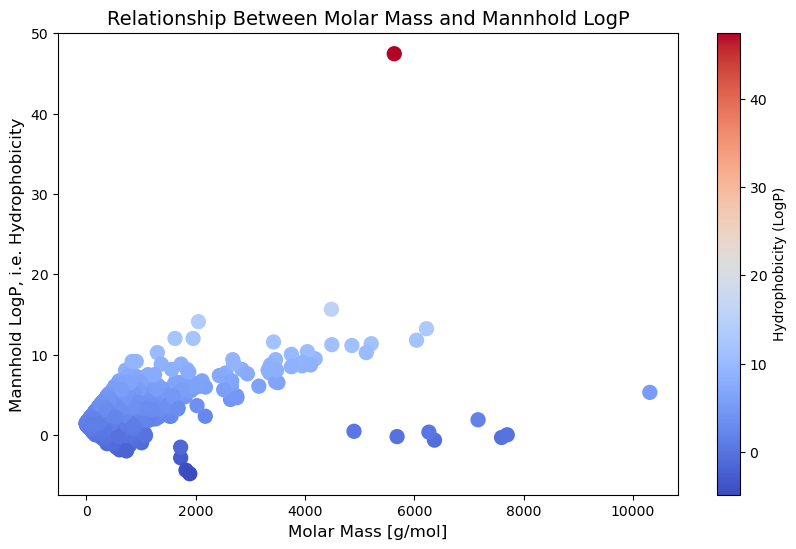

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'/Users/ludovica/Documents/Bachelor/BA5/Modeling Lab/4-Molecules.csv')

data['Molar Mass'] = pd.to_numeric(data['Molar Mass'], errors='coerce')
data['Mannhold LogP'] = pd.to_numeric(data['Mannhold LogP'], errors='coerce')

data = data.dropna(subset=['Molar Mass', 'Mannhold LogP'])

plt.figure(figsize=(10, 6))

scatter = plt.scatter(data['Molar Mass'], data['Mannhold LogP'], c=data['Mannhold LogP'], cmap='coolwarm', s=100)

plt.title('Relationship Between Molar Mass and Mannhold LogP', fontsize=14)
plt.xlabel('Molar Mass [g/mol]', fontsize=12)
plt.ylabel('Mannhold LogP, i.e. Hydrophobicity', fontsize=12)

plt.colorbar(scatter, label='Hydrophobicity (LogP)')
plt.show()

The graph displayed above shows the Mannhold log(P) as a function of the molar mass of the molecules present in the csv file. The Mannhold log(P) is a measure of how hydrophobic (water-repellent) a molecule is. One the right side of the graph, there is a scale of the hydrophobicity. A dark blue colour indicates very low hydrophobicity, i.e. high hydrophilicity whereas a dark red colour indicates gigh hydrophobicity.

Overall, the data suggests that as a molecule’s mass increases, its hydrophobicity also tends to increase. However, there are some interesting details to point out.

Most of the molecules are found in a lower molar mass range between 0 and 2000 g/mol, with hydrophobicity values (LogP) between 0 and 10. This shows that smaller molecules can have a wide range of hydrophobic properties. Even though these smaller molecules show a variety of behaviors, there is a clear grouping of molecules with low molar mass and moderate hydrophobicity, meaning that small molecules can still be fairly hydrophobic.

For larger molecules with molar masses between 3000 and 8000 g/mol, there are less data points. These molecules tend to have a more consistent hydrophobicity, mostly at 0 or 10 showing less variety. This suggests that larger molecules, while still hydrophobic, don’t vary as much in their water-repelling properties compared to smaller ones.

There is one noticeable exeption with a Mannhold LogP around 50 and a molar mass close to 3000 g/mol. This molecule is extremely hydrophobic compared to the others.

### Plot 2 - Correlation Heatmap

<Figure size 1200x1000 with 0 Axes>

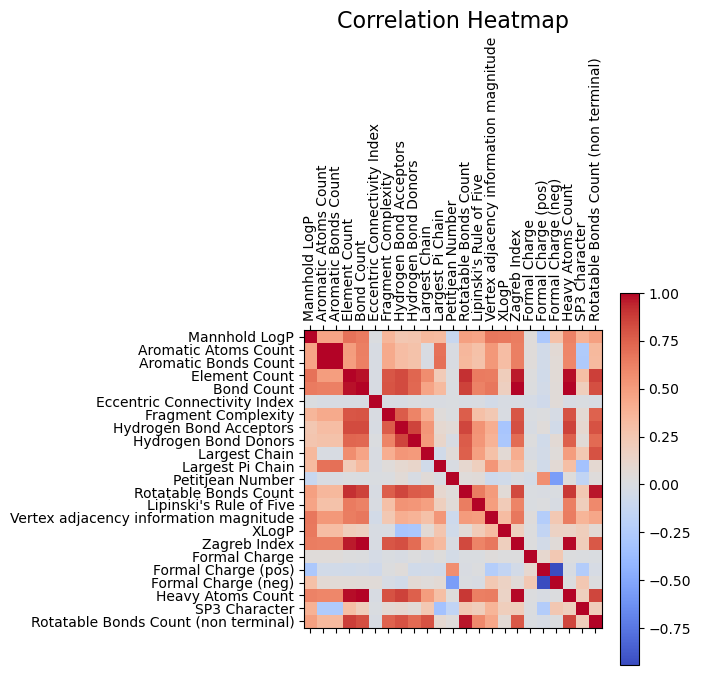

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
csv_file_path = '/Users/ludovica/Documents/Bachelor/BA5/Modeling Lab/4-Molecules.csv'  
data = pd.read_csv(csv_file_path)

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the figure
plt.figure(figsize=(12, 10))

# Create the heatmap
cax = plt.matshow(correlation_matrix, cmap='coolwarm')

# Add color bar
plt.colorbar(cax)

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Show the plot without displaying numbers
plt.show()


### Correlation Heatmap Analysis

#### Overview

The correlation heatmap shown above represents the pairwise relationships between various molecular properties. Each square in the heatmap reflects the correlation coefficient between two variables, which can range from -1 to +1:
- **+1**: Strong positive correlation (both variables increase together).
- **0**: No correlation (the variables are independent).
- **-1**: Strong negative correlation (as one variable increases, the other decreases).

The heatmap uses a color gradient to display correlations, where:
- **Red**: Positive correlation
- **Blue**: Negative correlation
- **White**: No correlation

#### Steps Taken in the Analysis

1. **Data Collection**: Various molecular descriptors were calculated for a dataset of compounds. These descriptors are features commonly used in cheminformatics for predicting molecular properties and behaviors.

2. **Data Preprocessing**: The molecular data was processed to ensure that the variables were standardized, and any missing values were handled appropriately.

3. **Correlation Calculation**: Pearson’s correlation coefficients were computed between all pairs of molecular descriptors. These values show how the variables are linearly related to each other.

4. **Visualization**: A heatmap was created to visually represent these correlations. The color gradient helps identify both positive and negative relationships.

#### Key Insights

- **High Positive Correlations**:
  - Certain descriptors such as **Hydrogen Bond Acceptors** and **Fragment Complexity** appear to have strong positive correlations, indicating that an increase in one likely leads to an increase in the other.

- **Negative Correlations**:
  - Variables like **Rotatable Bonds Count (non-terminal)** and **SP3 Character** show negative correlations with others, suggesting that as one increases, the other tends to decrease.

- **Zero/Weak Correlations**:
  - Many of the variables, such as **XLogP** and **Aromatic Atoms Count**, display weaker correlations with other descriptors, indicating that these are relatively independent factors in this dataset.

- **Remark**:
    - One should note that this distribution is symmetric with respect to the 100% correlation diagonal (going from the top left side to the bottom right)
This visual representation is a powerful way to quickly identify relationships between multiple variables in your dataset, which can inform further analysis or modeling efforts.

#### Conclusion
The heatmap provides a clear visual guide to how molecular descriptors interact with each other. This analysis can be further used to select or eliminate certain features in predictive modeling, based on their redundancy or independence. For example, descriptors that are highly correlated (red regions) may provide similar information and could be considered for dimensionality reduction, whereas descriptors with low or no correlation might offer unique insights into molecular properties.